In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import os
from collections import defaultdict
from tqdm import tqdm

In [ ]:
!pip install geopandas

import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

     |████████████████████████████████| 1.0 MB 7.5 MB/s 
     |████████████████████████████████| 16.7 MB 297 kB/s 
     |████████████████████████████████| 6.3 MB 44.8 MB/s 


In [ ]:
!gsutil ls gs://eccv16/dataset_unaligned

gs://eccv16/dataset_unaligned/
gs://eccv16/dataset_unaligned/0003.tar
gs://eccv16/dataset_unaligned/0004.tar
gs://eccv16/dataset_unaligned/0009.tar
gs://eccv16/dataset_unaligned/0012.tar
gs://eccv16/dataset_unaligned/0014.tar
gs://eccv16/dataset_unaligned/0017.tar
gs://eccv16/dataset_unaligned/0020.tar
gs://eccv16/dataset_unaligned/0022.tar
gs://eccv16/dataset_unaligned/0024.tar
gs://eccv16/dataset_unaligned/0026.tar
gs://eccv16/dataset_unaligned/0028.tar
gs://eccv16/dataset_unaligned/0030.tar
gs://eccv16/dataset_unaligned/0032.tar
gs://eccv16/dataset_unaligned/0033.tar
gs://eccv16/dataset_unaligned/0035.tar
gs://eccv16/dataset_unaligned/0036.tar
gs://eccv16/dataset_unaligned/0058.tar
gs://eccv16/dataset_unaligned/0059.tar
gs://eccv16/dataset_unaligned/0060.tar
gs://eccv16/dataset_unaligned/0061.tar
gs://eccv16/dataset_unaligned/0062.tar
gs://eccv16/dataset_unaligned/0063.tar
gs://eccv16/dataset_unaligned/0064.tar
gs://eccv16/dataset_unaligned/0065.tar
gs://eccv16/dataset_unaligned/006

In [ ]:
!gsutil cat gs://eccv16/dataset_unaligned/Readme.rtf

{\rtf1\ansi\ansicpg1252\cocoartf1404\cocoasubrtf470
{\fonttbl\f0\fswiss\fcharset0 Helvetica;\f1\fnil\fcharset0 HelveticaNeue;}
{\colortbl;\red255\green255\blue255;}
\margl1440\margr1440\vieww10800\viewh8400\viewkind0
\deftab720
\pard\pardeftab720\partightenfactor0

\f0\fs24 \cf0 \expnd0\expndtw0\kerning0
\
The street view data is given as images and corresponding text files that contain the meta data. The data is organised in data sets. Each data set corresponds to a rectangular sub region on the map.\
\
The image/text files of one dataset might be again stored in several folders. However, the folders do not have a semantic meaning, its just to keep the number of files in one folder below a certain maximum.\
\
The format itself is very simple:\
\
Lets consider a 3D point of a building that is given as (lat,long,height). This point is referred to as target point. Now, we have a set of street view locations where this point is visible from. The street view points a also given as (lat, lo

In [ ]:
!gsutil cp gs://eccv16/dataset_aligned/0002.tar .

Copying gs://eccv16/dataset_aligned/0002.tar...
| [1 files][  4.7 GiB/  4.7 GiB]   54.8 MiB/s                                   
Operation completed over 1 objects/4.7 GiB.                                      


In [ ]:
!gsutil cp gs://eccv16/dataset_aligned/0003.tar .

Copying gs://eccv16/dataset_aligned/0003.tar...
- [1 files][  7.5 GiB/  7.5 GiB]   56.3 MiB/s                                   
Operation completed over 1 objects/7.5 GiB.                                      


In [ ]:
!tar xvf 0002.tar 0002/
!tar xvf 0003.tar 0003/

Streaming output truncated to the last 5000 lines.
0003/0000003_0175457_0000007_0029901.txt
0003/0000003_0116841_0000001_0020168.jpg
0003/0000003_0089322_0000007_0015480.jpg
0003/0000003_0020272_0000003_0003510.txt
0003/0000003_0107859_0000004_0018679.txt
0003/0000003_0100724_0000007_0017459.jpg
0003/0000003_0010030_0000007_0001703.jpg
0003/0000003_0158870_0000007_0027176.jpg
0003/0000003_0046636_0000002_0008033.txt
0003/0000003_0069279_0000002_0011917.txt
0003/0000003_0082941_0000003_0014311.jpg
0003/0000003_0015900_0000005_0002771.jpg
0003/0000003_0173782_0000001_0029620.txt
0003/0000003_0115254_0000002_0019903.jpg
0003/0000003_0128670_0000007_0022166.txt
0003/0000003_0187641_0000005_0032066.jpg
0003/0000003_0090971_0000007_0015789.txt
0003/0000003_0131998_0000002_0022713.txt
0003/0000003_0115276_0000007_0019907.txt
0003/0000003_0037178_0000001_0006488.txt
0003/0000003_0019197_0000005_0003332.jpg
0003/0000003_0181082_0000004_0030899.jpg
0003/0000003_0035375_0000004_0006131.jpg
0003/0

In [ ]:
!rm -rf 0003.tar
!rm -rf 0002.tar

In [ ]:
!cat 0002/0000002_0040381_0000002_0007374.txt

d 2 7374 40381 2 3.893810137479508e+01 -7.705973085998285e+01  8.838849999999999e+01 4.472136000000000e-01 -8.944272000000000e-01  0.000000000000000e+00 3.893774600000000e+01 -7.705973799999995e+01  6.871257781982401e+01 3.952069937492784e+01 8.953277039081645e-01 2.646704740065487e+01 0.000000000000000e+00
a 3.376357172449756e+02 3.009436806147627e+02 1.000000000000000e+00 1.723591436210967e+00 -7.079147172404602e-01 -3.132241551731019e-03  2.914528354816400e-01  1.880574305664761e+00  2.686199095940254e-03 -4.566647999401488e+02 -1.871019165356724e+02  1.876827744538828e+00 4.601890863517656e+02 1.885966917065894e+02 4.656521082955028e+02 4.151914832293937e+02 2.465648916176748e+02 3.888327854892394e+02 1.884692853473169e+02 2.340374382405752e+02 -1.323610943460688e+00 -1.618113402686090e+00 -2.760882002494508e-03  6.872928226391615e-01 -4.052121454899337e-01  2.145507665704200e-03 -2.942807989367762e+01  3.987889353559840e+02 -5.556607811794426e-01 8962627.25 6.281250000000000e-01 6

In [ ]:
!cat 0003/0000003_0166760_0000005_0028457.txt

d 3 28457 166760 5 3.899063356552980e+01 -7.704357016802155e+01  6.810460999999999e+01 -9.593655000000000e-01 -2.821663000000000e-01  0.000000000000000e+00 3.899043999999998e+01 -7.704367699999999e+01  6.625867462158200e+01 2.342031496374757e+01 2.321818158705979e+01 4.506604996196265e+00 0.000000000000000e+00
a 3.609002390555331e+02 3.220066973112654e+02 1.000000000000000e+00 2.098987386012237e+00  7.328335493858713e-01  6.131249686435878e-03  4.325394210959987e-02  7.551082287050648e-01  3.986543003173692e-04 -5.091382217241320e+02 -2.997621681689519e+02 -4.639544829394964e-01 5.040550819816665e+02  2.327311625376396e+02  8.043764611840654e+02  5.723915305296709e+02 -1.060761425843676e+02  5.220224213784090e+02  1.658103314799794e+02  2.396573797205260e+02 3.533537273724025e+00  1.556129699278180e+00  4.493819265485536e-03 -9.936091321929083e-02  1.515353524875462e+00 -1.071145793343491e-04 -8.792915254976009e+02 -6.855935224815807e+02 -4.499287046561847e-01 8400752 4.322916666666667

Populating the interactive namespace from numpy and matplotlib


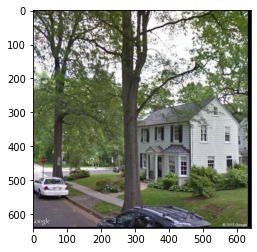

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('0002/0000002_0125715_0000003_0021923.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
 def coors(filename):
  with open(filename) as fp:
    f = fp.read()
    f = f.split(' ')
    f = f[5:7]
    f = [float(x) for x in f]
  return tuple(f)

In [ ]:
def folders_to_coors(folder_name):
  coor_set = set()
  for file in tqdm(os.listdir(folder_name)):
    if file[-3:] == 'txt':
      coords = coors(f'{folder_name}/{file}')
      coor_set.add(coords)
  return coor_set

In [ ]:
df_0002 = pd.DataFrame(folders_to_coors('0002'))
df_0003 = pd.DataFrame(folders_to_coors('0003'))
df_0002.columns = ['Latitude', 'Longitude']
df_0003.columns = ['Latitude', 'Longitude']

100%|██████████| 216898/216898 [01:14<00:00, 2898.72it/s]


In [ ]:
BBox = ((-77.2315, -76.7783,
         38.8381, 39.0613))

In [ ]:
washington_map = plt.imread('map.png')

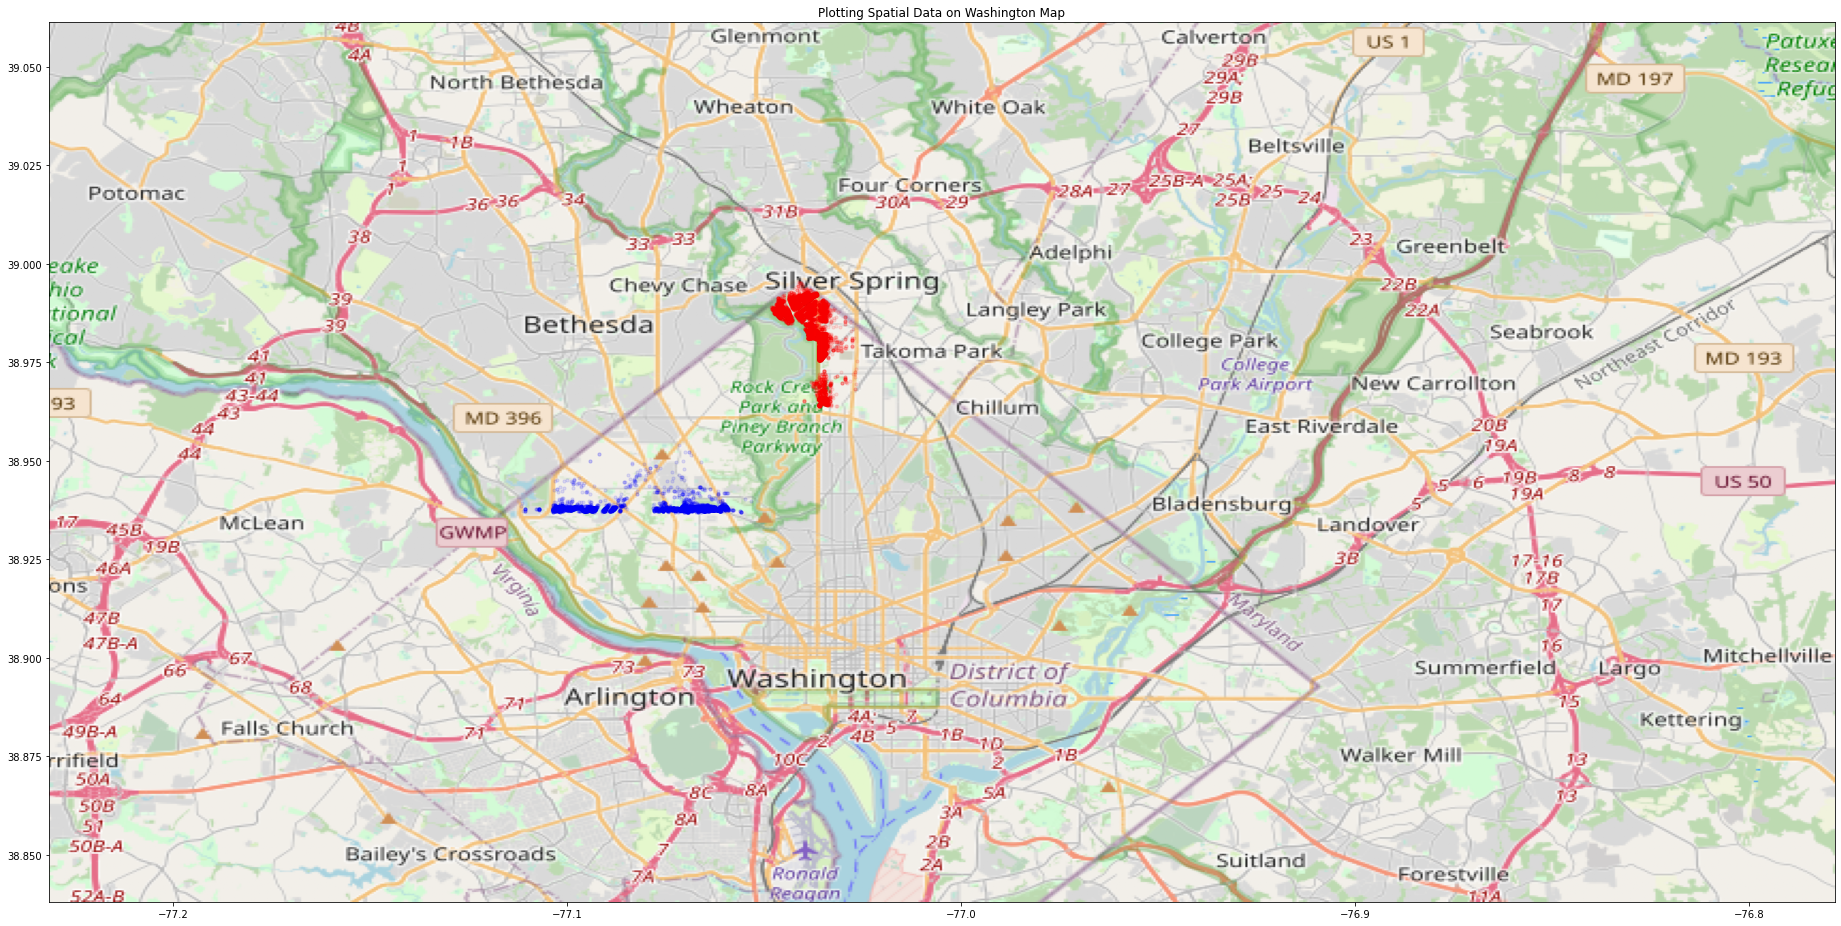

In [ ]:
fig, ax = plt.subplots(figsize = (32,28))
ax.scatter(df_0002.Longitude, df_0002.Latitude, zorder=1, alpha= 0.1, c='b', s=10)
ax.scatter(df_0003.Longitude, df_0003.Latitude, zorder=1, alpha= 0.1, c='r', s=10)
ax.set_title('Plotting Spatial Data on Washington Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(washington_map, zorder=0, extent = BBox, aspect= 'equal')